# Sales Forecasting

Step 1: Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load Dataset

In [42]:
data = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Documents\\project-1\\Walmart_sales.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Step 2: Data Preprocessing

In [11]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [12]:
# Sort data by 'Date'
data.sort_values(by='Date', inplace=True)

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


 Step 3: Exploratory Data Analysis (EDA)


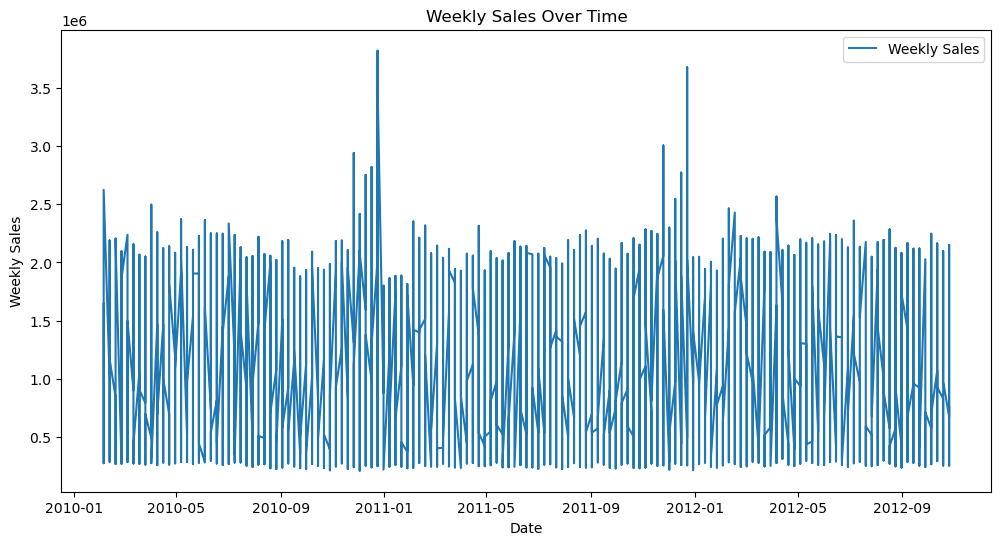

In [39]:
# Time Series Plot of Weekly Sales
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

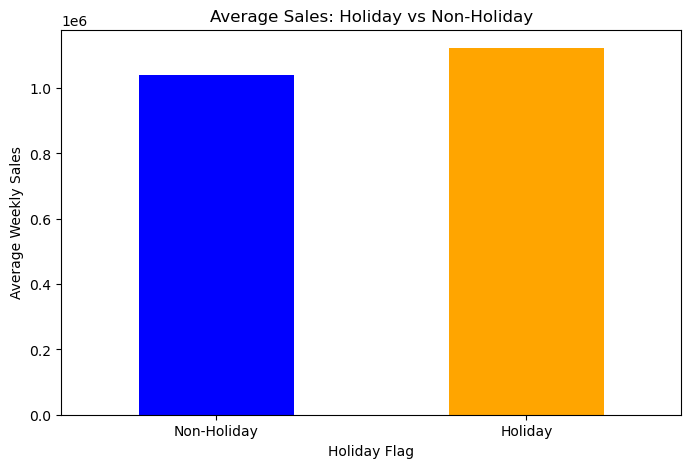

In [16]:
# Holiday Impact
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_sales.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 5))
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

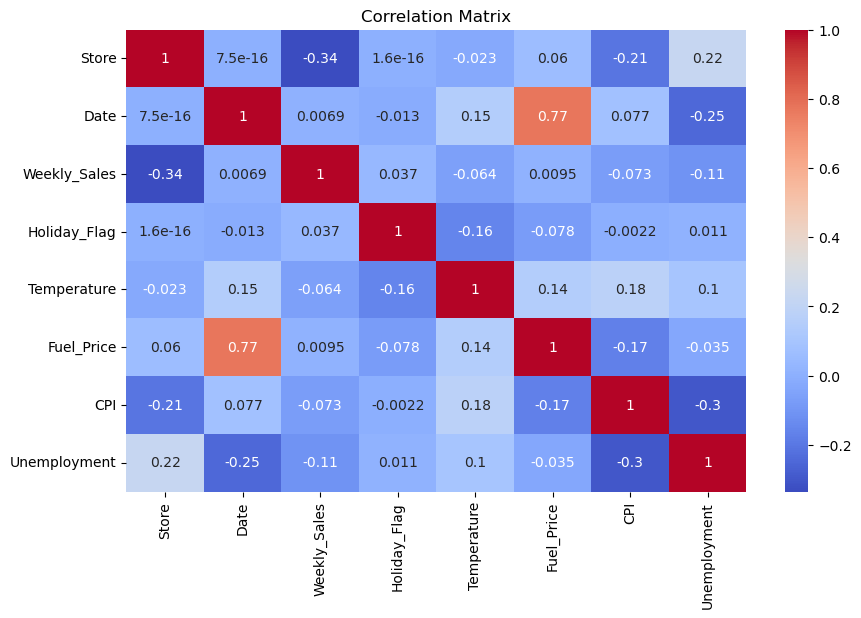

In [17]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Step 4: Feature Engineering

In [18]:
# Extract time-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

Step 5: Split Data for Modeling


In [19]:
X = data[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week']]
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Model Training

In [21]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

Step 7: Model Evaluation

In [33]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 61457.744260062114
Root Mean Squared Error: 123503.99152472868
R-squared: 0.9510705656398181


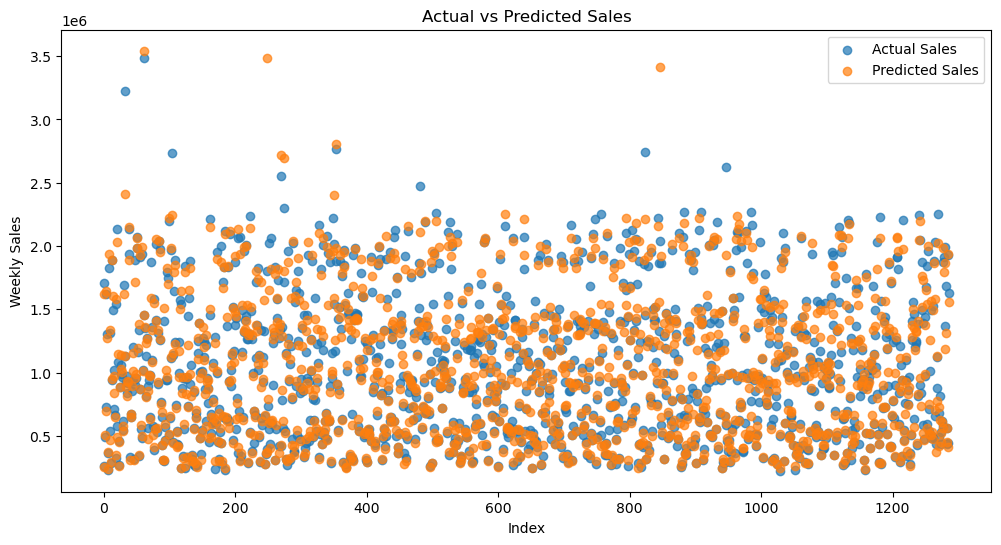

In [31]:
# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test.values, label='Actual Sales', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Sales', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()